In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
titanic_df=pd.read_csv('../data/titanic.csv')
titanic_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [45]:
# Null 값을 평균 또는 고정 값으로 변경
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)
titanic_df['cabin'].fillna('N', inplace=True)
titanic_df['embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [46]:
print('Sex 값 분포 : \n', titanic_df['sex'].value_counts())
print('\n carbin 값 분포 :\n', titanic_df['cabin'].value_counts())
print('\n embarked 값 분포:\n', titanic_df['embarked'].value_counts())

Sex 값 분포 : 
 sex
male      577
female    314
Name: count, dtype: int64

 carbin 값 분포 :
 cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 embarked 값 분포:
 embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [47]:
titanic_df['cabin'] = titanic_df['cabin'].str[:1]
print(titanic_df['cabin'].head(3))

0    N
1    C
2    N
Name: cabin, dtype: object


In [48]:
titanic_df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

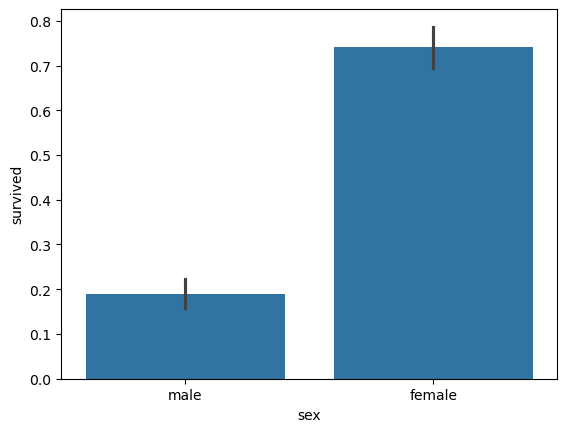

In [49]:
# 성별에 따른 생존
sns.barplot(x='sex', y = 'survived', data=titanic_df)

<Axes: xlabel='pclass', ylabel='survived'>

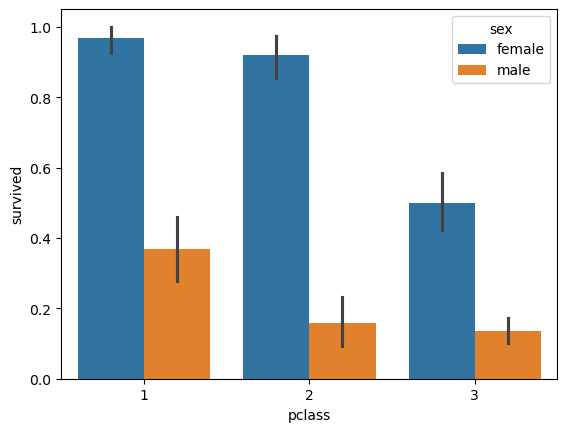

In [50]:
# 부자와 가난한 사람간의 생존 확률
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_df)

In [51]:
# 1등실이 제일높고 3등실이 제일 낮음을 확인

In [52]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정, DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'unknown'
    elif age <= 5: cat = 'baby'
    elif age <= 12: cat = 'child'
    elif age <= 18: cat = 'teenager'
    elif age <= 25: cat = 'student'
    elif age <=35 : cat = 'young adult'
    elif age <=60 : cat = 'adult'
    else : cat = 'elderly'

    return cat


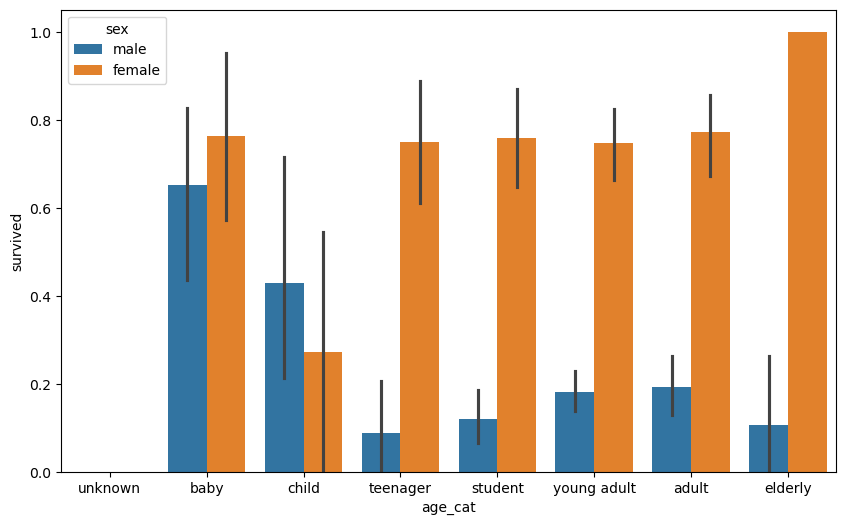

In [53]:
# 막대 그래프
plt.figure(figsize=(10, 6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['age_cat'] = titanic_df['age'].apply(lambda x: get_category(x))
sns.barplot(x='age_cat', y='survived', hue='sex', data=titanic_df, order=group_names)
titanic_df.drop('age_cat', axis=1, inplace=True)

In [54]:
# sex, age, pclass 등이 중요하게 생존을 좌우하는 피처임을 확인

In [55]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하기
from sklearn.preprocessing import LabelEncoder

def encode_features(datadf):
    features = ['cabin', 'sex', 'embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(datadf[feature])
        datadf[feature] = le.transform(datadf[feature])
    return datadf
titanic_df = encode_features(titanic_df)
titanic_df.value_counts()

survived  pclass  name                                                 sex  age        sibsp  parch  ticket            fare      cabin  embarked
0         1       Allison, Miss. Helen Loraine                         0    2.000000   1      2      113781            151.5500  2      3           1
1         1       Flynn, Mr. John Irwin ("Irving")                     1    36.000000  0      0      PC 17474          26.3875   4      3           1
                  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  0    38.000000  1      0      PC 17599          71.2833   2      0           1
                  Daly, Mr. Peter Denis                                1    51.000000  0      0      113055            26.5500   4      3           1
                  Daniel, Mr. Robert Williams                          1    27.000000  0      0      113804            30.5000   7      3           1
                                                                                                         

In [56]:
# Null 처리 함수
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['embarked'].fillna('N', inplace=True)
    df['fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['name', 'ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin', 'sex', 'embarked']

    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [57]:
#원본 데이터 재로딩, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('../data/titanic.csv')
y_titanic_df = titanic_df['survived']
X_titanic_df = titanic_df.drop('survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, 
                                                  test_size=0.2, random_state=11)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
# 결정트리. Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
dt_pred = df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도 : 0.8659


In [64]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kf = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kf.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(df_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(df_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


#### chapter5 회귀

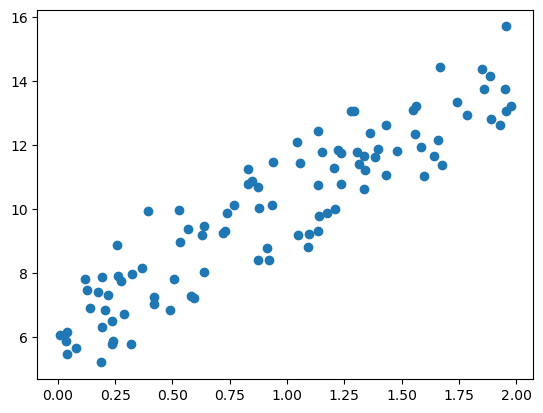

In [66]:
# 경사 하강법을 파이썬 코드로 구현
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

plt.scatter(X,y)

In [67]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [68]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [69]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [70]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/ N
    return cost
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


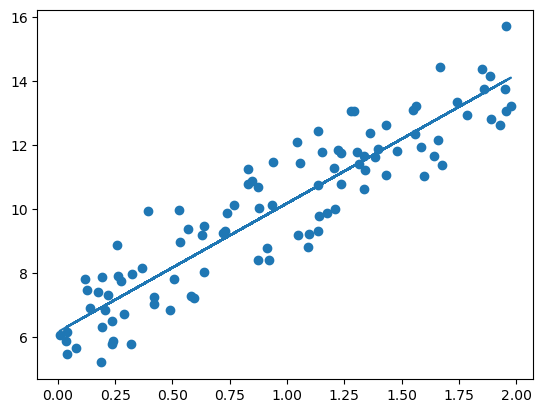

In [71]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [72]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [73]:
# w1, w0 예측 오류 비용을 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [75]:
# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
# 보스턴 주택 가격 회귀 구현

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
FILE = '../data/boston.csv'
bostondf=pd.read_csv(FILE)

# boston 데이터 세트의 target 배열은 주택 가격. 이를 PRICE 컬럼으로 추가
bostondf['PRICE'] = boston.target
print('boston 데이터 세트 크기:', bostondf.shape)
bostondf.head()

NameError: name 'boston' is not defined